$\textbf{Excercise G}$

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from Formulas import f

S = 420* 0.09290304 #ft^2 o m^2
Span = 43 * np.sqrt(0.09290304)
mass = 31000 * 0.45359237 
e = 0.82
CD_0 = 0.0185; 
Cl_m = 1.14



1) the minimum and maximum airspeed in SLF at 40 000 ft;

SLF : dv/dt = 0 and L=W

In [70]:
AR = f.AR_Calc(Span,S)
k = f.Induced_Drag_Factor_Calc(AR,e)

P_FL40,T_FL40,Rho_FL40 = f.get_atmosphere_properties(40000,'ft')

#From GRAPH SLF --> FA=FR --> Ps = 0
Mach_min = 0.63
v = f.Mach_To_V_Calc(0.63,T_FL40)
print(v)
Mach_max_Dynamic_pressure = 2.35 #Due to dynamic pressure, V max is lower, than crossing FA and Fr


185.8766609690415


2) the minimum time needed to accelerate from M = 1, 1 to M = 1, 9 at 40 000 ft; 

Ps = v/g * dv/dt --> you need dt

In [71]:
M0 = 1.1
Ps = 300 * 0.3048  #From graph at 40 000 ft #PS 300_350_400_350_300
dt = 0

V0_1 = f.Mach_To_V_Calc(1.1,T_FL40)

V0 = f.Mach_To_V_Calc(1.3,T_FL40)

dt += (V0_1/9.81) * ((V0-V0_1)/(350*0.3048))

V0_1 = V0

V0 = f.Mach_To_V_Calc(1.5,T_FL40)

dt += (V0_1/9.81) * ((V0-V0_1)/(400*0.3048))

V0_1 = V0

V0 = f.Mach_To_V_Calc(1.7,T_FL40)

dt += (V0_1/9.81) * ((V0-V0_1)/(350*0.3048))

V0_1 = V0

V0 = f.Mach_To_V_Calc(1.9,T_FL40)

dt += (V0_1/9.81) * ((V0-V0_1)/(300*0.3048))

print(f"Time to accelerate {dt:.3} s")


Time to accelerate 95.2 s


3) the velocity hodograph and the maximum climb angle at 35 000 ft;

Max climb anlge: 28.32


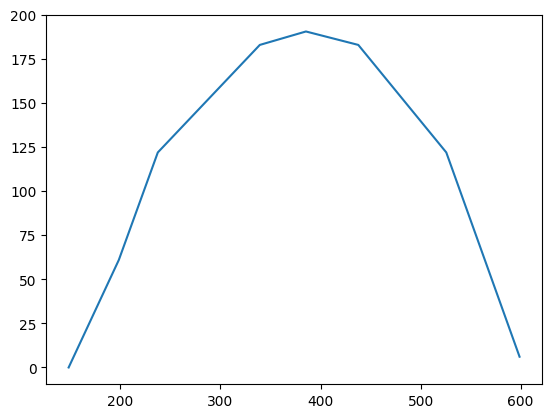

In [72]:
PS = np.array([0, 200 , 400 , 600, 625, 600,400, 20]) *0.3048

M = np.array([0.5, 0.7 ,0.9 ,1.3 ,1.45 ,1.6 ,1.82 ,2.02])

P_FL35,T_FL35,Rho_FL35 = f.get_atmosphere_properties(35000,'ft')

V = f.Mach_To_V_Calc(M, T_FL35)

V_HOR = np.sqrt(V**2 - PS**2)
gamma = np.rad2deg(np.asin(PS/V))
print(f"Max climb anlge: {np.max(gamma):.2f}")

plt.figure()

plt.plot(V_HOR,PS)

'°the maximum allowable dynamic pressure (qmax);

In [73]:
#qmax = 1/2 rho v^2
#At 40 000 ft; M =2.35 Q max

V = f.Mach_To_V_Calc(2.35,T_FL40)

q_FL40 = 0.5 * Rho_FL40 * V**2
print(f"Dynamic Pressure at 40 000ft: {q_FL40:.2f} Pa")

Dynamic Pressure at 40 000ft: 72497.96 Pa


5. the equivalent cornering speed;

In [ ]:

V_stall = f.V_Stall_In_Climb(9.81*mass,0,Rho_FL40,S,Cl_m) #EQUIVALENT == Independet of altitude

V_man_EQ = V_stall *np.sqrt(Rho_FL40/1.2225) 


6. at 40 000 ft:
(a) the maximum instantaneous turn rate;
(b) the maximum instantaneous turn rate at M = 1, 9.

In [79]:
#A

Max_turn_rate = (f.g*np.sqrt(9**1 - 1)/V_man_EQ)

V_M_1_9 = f.Mach_To_V_Calc(1.9,T_FL40)

Max_turn_rate_M_1_9 = (9.81*np.sqrt(9**1 - 1)/V_M_1_9) #n = nlin because V > Vmaneuver

print(f'Max turn ar M= 1,9 :{Max_turn_rate_M_1_9} rad/s')


Max turn ar M= 1,9 :0.049496681995969634 rad/s


the specific excess power in a sustained coordinated level turn with a radius of 1, 5 km at M = 0, 8
at 15 000 ft;

In [ ]:
Radius = 1.5 #km

P_FL15,T_FL15,Rho_FL15 = f.get_atmosphere_properties(15000,'ft')

M = 0.8 
V = f.Mach_To_V_Calc(0.8,T_FL15)
Cl =f.V_To_CL_Calc(mass,V,Rho_FL15,S)
Cd = f.Cd_Calc(CD_0,k,Cl)
Fr= f.Thrust_Calc(Cd,Rho_FL15,V,S)
Fa = (Ps*mass*9.81)/(V) + Fr
print(Fa)

n = np.sqrt(1 + (V**2/(1500*9.81))**2)
print(n)
L = mass*9.81*n
phi = np.rad2deg(np.acos(1/n))

Cl = L/(0.5*Rho_FL15*V**2*S)
cd = f.Cd_Calc(CD_0,k,Cl)
Fr = f.Thrust_Calc(Cd,Rho_FL15,V,S)


183266.68810894538
4.625615838086112
77.51479947085137
